# EV Market Size Analysis

Dataset is taken from https://statso.io/market-size-of-evs-case-study/

__Step1 - Importing required libraries__

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

__Step2 - data inspection__

In [3]:
df = pd.read_csv(r"C:\Users\user\Documents\EV_market_size_analysis\Electric_Vehicle_Population_Data.csv")

In [4]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [5]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [6]:
df.shape

(177866, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [8]:
## chcek for null value in df
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [9]:
percent_null = (df.isnull().sum()/len(df))*100

In [10]:
percent_null

VIN (1-10)                                           0.000000
County                                               0.002811
City                                                 0.002811
State                                                0.000000
Postal Code                                          0.002811
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
Legislative District                                 0.218704
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.005060
Electric Utility                                     0.002811
2020 Cen

Since the count of null in dataset is minimal so its better to drop them 

In [11]:
df=df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177473 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177473 non-null  object 
 1   County                                             177473 non-null  object 
 2   City                                               177473 non-null  object 
 3   State                                              177473 non-null  object 
 4   Postal Code                                        177473 non-null  float64
 5   Model Year                                         177473 non-null  int64  
 6   Make                                               177473 non-null  object 
 7   Model                                              177473 non-null  object 
 8   Electric Vehicle Type                              177473 non-null  object 
 9 

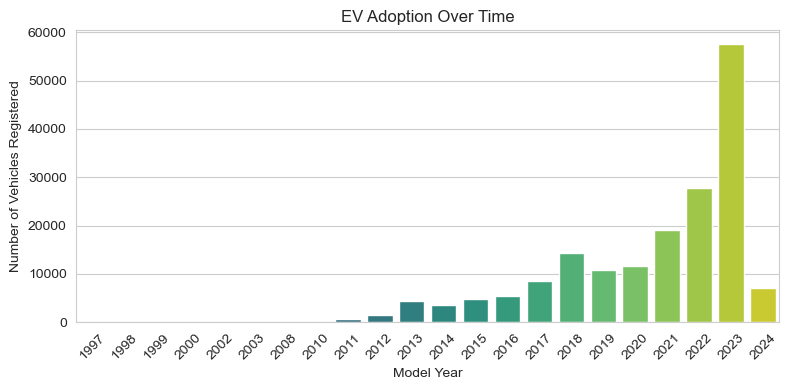

In [13]:
# EV Adoption Over Time
sns.set_style('whitegrid')

plt.figure(figsize=(8,4))
ev_adoption_count = df['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_count.index,y=ev_adoption_count.values,palette="viridis")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# geographical distribution at county level

ev_county_dist = df['County'].value_counts()
top_country = ev_county_dist.head(3).index

# filtering the dataset for these top counties
top_country_data = df[df['County'].isin(top_country)]

# analyzing the distribution of EVs within the cities of these top counties
ev_top_county_city = top_country_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_top_county_city.head(10)

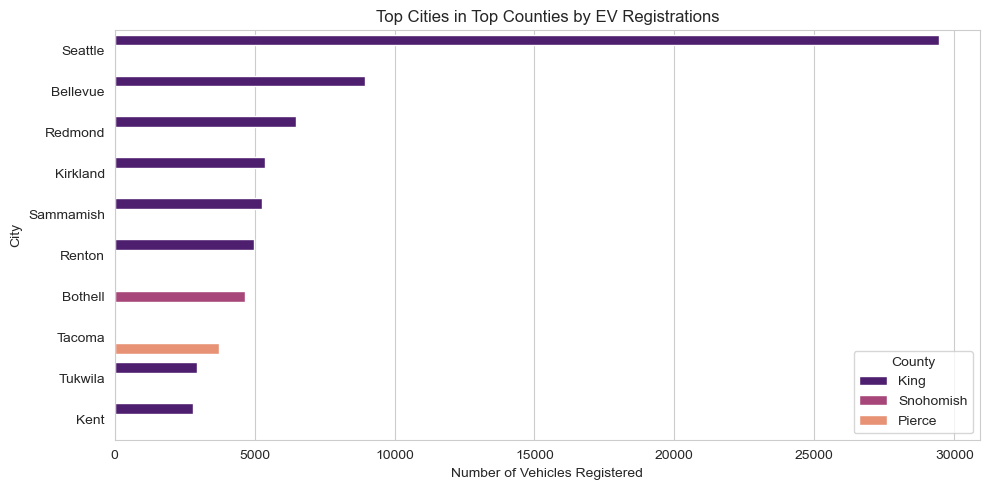

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

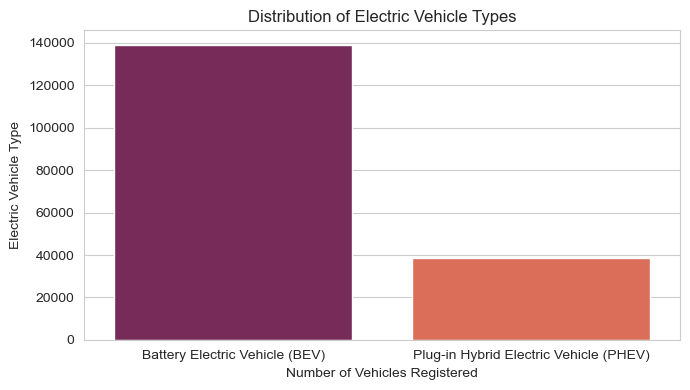

In [16]:
# analyzing the distribution of electric vehicle Types
ev_type_distribution = df['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(7,4))
sns.barplot(x=ev_type_distribution.index, y=ev_type_distribution.values, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

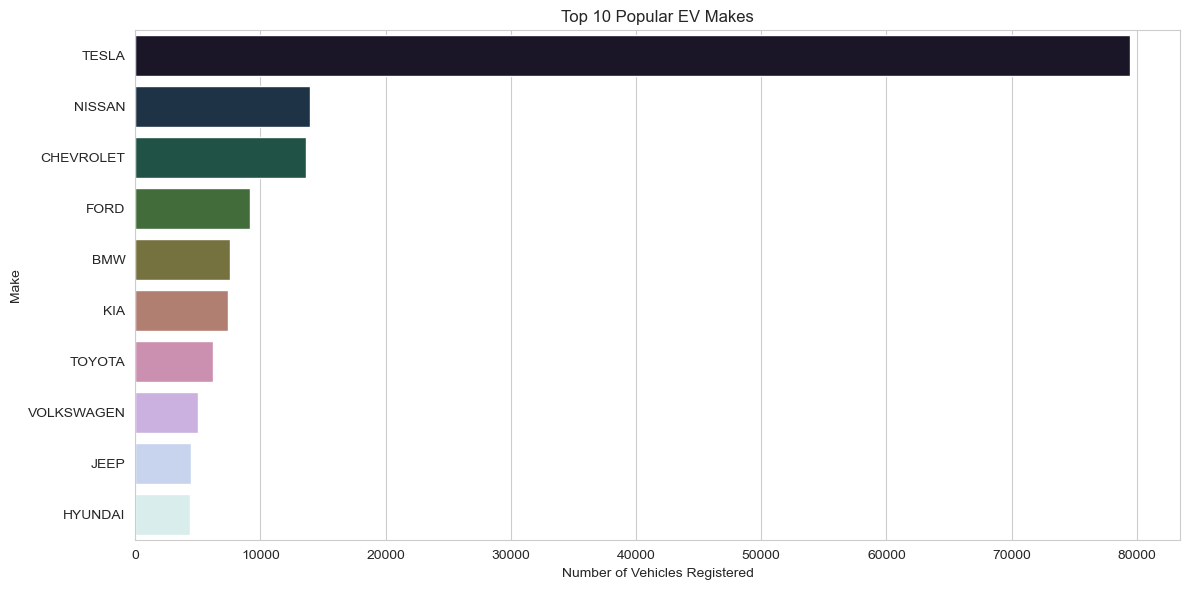

In [17]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = df['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

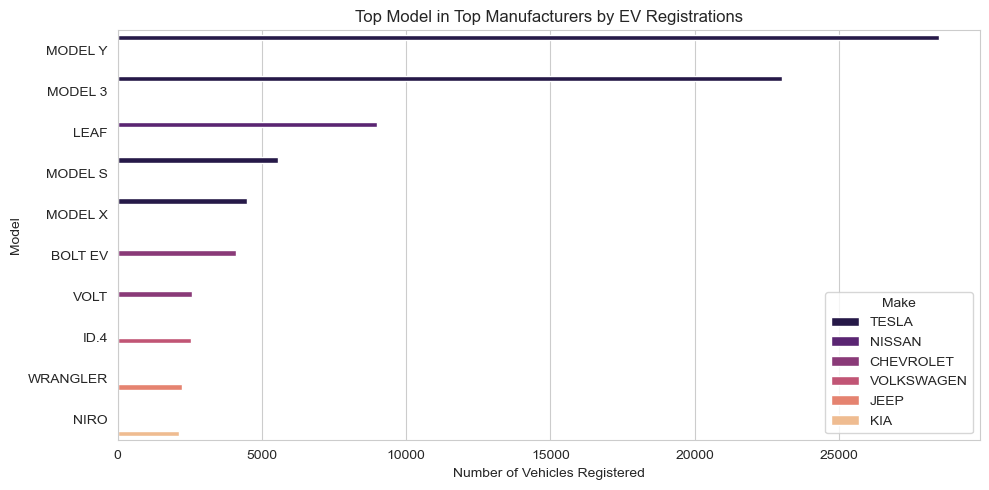

In [18]:
# selecting the top 3 manufacturers based on the number of vehicles registered

top_makers = ev_make_distribution.head(3).index

# filtering the dataset for these top counties
top_mfg_data = df[df['Make'].isin(top_makers)]

# analyzing the distribution of EVs within the cities of these top counties
ev_top_mfg_model = top_country_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles registred')

# visualize the top 10 cities across these counties
top_model = ev_top_mfg_model.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='Number of Vehicles registred', y='Model', hue='Make', data=top_model, palette="magma")
plt.title('Top Model in Top Manufacturers by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make')
plt.tight_layout()
plt.show()

In [19]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

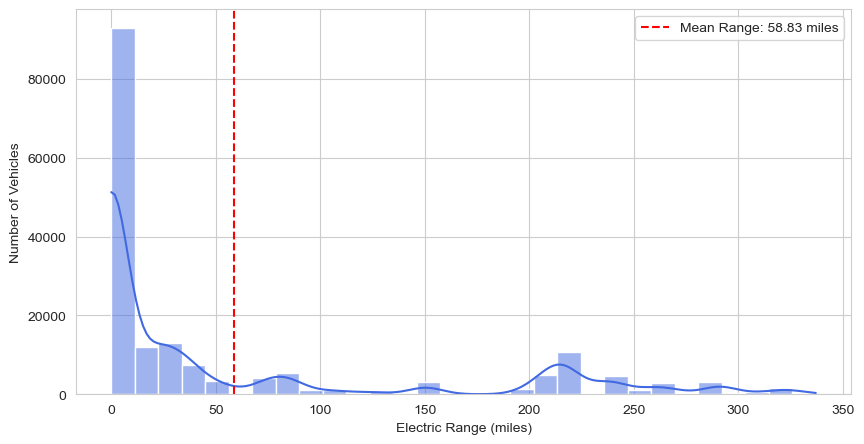

In [20]:
# analyzing the distribution of electric range
plt.figure(figsize=(10,5))
sns.histplot(df['Electric Range'],bins=30,kde=True, color='royalblue')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(df['Electric Range'].mean(),color='red', linestyle='--', label=f'Mean Range: {df["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

In [21]:
df['Base MSRP'].value_counts()

Base MSRP
0         174142
69900       1366
31950        381
52900        222
32250        136
59900        127
54950        126
39995        111
36900        104
44100         91
45600         82
64950         81
33950         76
52650         68
34995         65
36800         55
55700         54
53400         37
81100         23
110950        20
98950         19
90700         18
75095         13
102000        12
184400        10
43700         10
89100          8
109000         7
91250          5
32995          3
845000         1
Name: count, dtype: int64

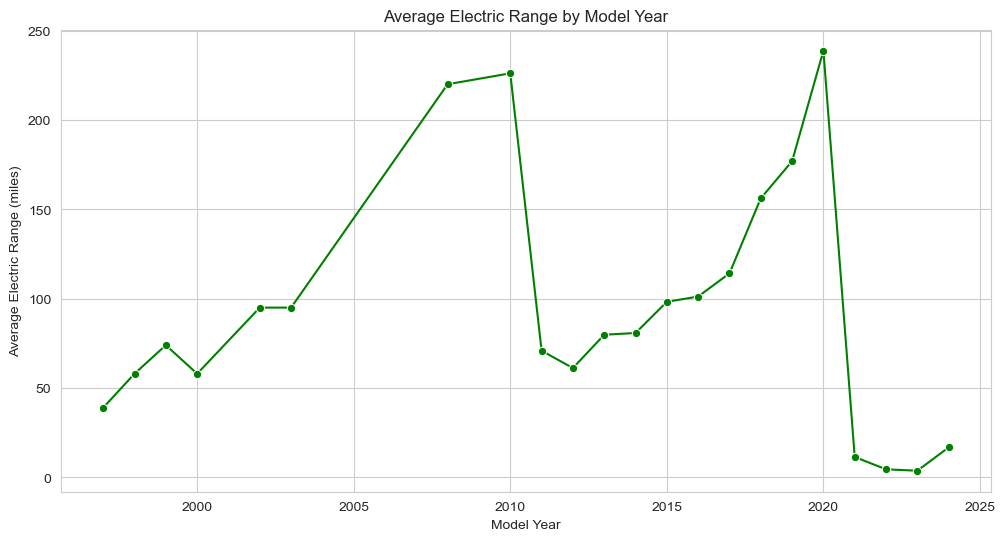

In [22]:
# calculating the average electric range by model year
average_range_by_year = df.groupby('Model Year')['Electric Range'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

In [23]:
ev_make_distribution = df['Make'].value_counts().head(10)
top_3_makes = ev_make_distribution.head(3).index
top_makes_data = df[df['Make'].isin(top_3_makes)]

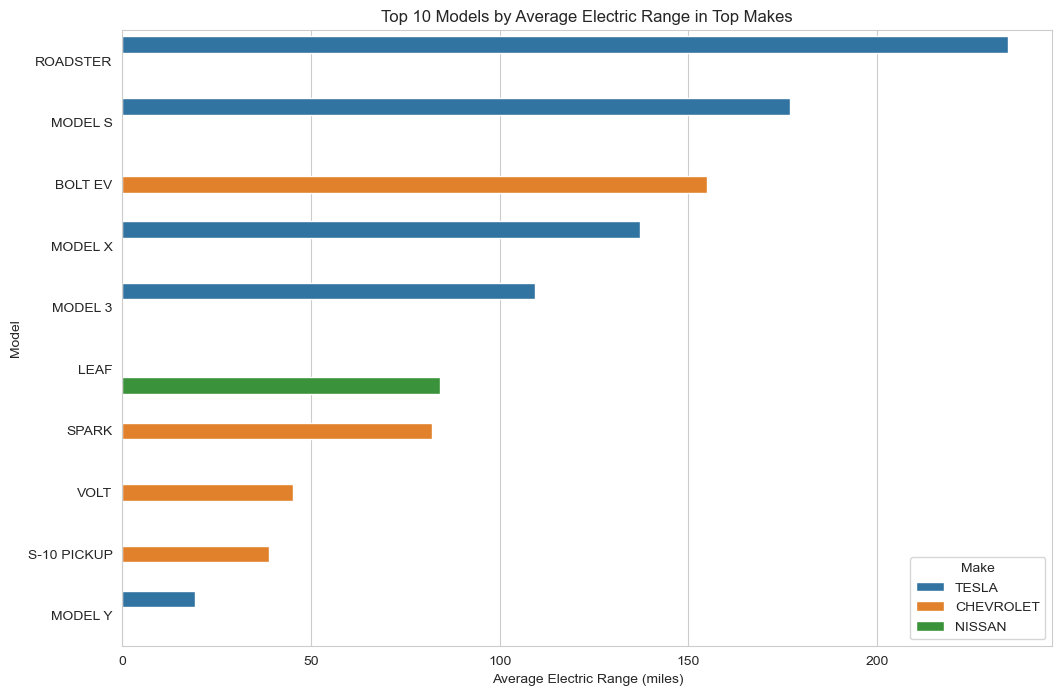

In [24]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models)
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make')
plt.show()

In [25]:
# calculate the number of EVs registered each year
ev_registration_counts = df['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

In [26]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


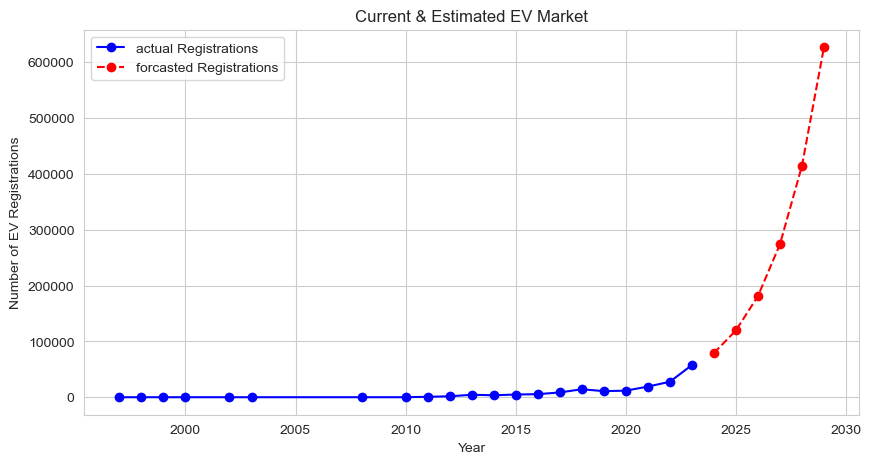

In [36]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(),2029+1)
actual_years = filtered_years.index
forcasted_years = np.arange(2024,2029+1)

# actual and forecasted values
actual_values = filtered_years.values
forecated_values = [forecasted_evs[year] for year in forcasted_years]
plt.figure(figsize=(10,5))
plt.plot(actual_years,actual_values,'-bo',label='actual Registrations')
plt.plot(forcasted_years,forecated_values,'ro--',label='forcasted Registrations')
plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming `filtered_years` is a pandas Series with a DateTimeIndex
model = ARIMA(filtered_years.values, order=(1, 1, 1))  # Example order, adjust as needed
model_fit = model.fit()
forecast = model_fit.forecast(steps=6)

# print(forecast)

# create a dictionary to display the forecasted values for easier interpretation
arima_forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecast))
print(arima_forecasted_evs)

{2024: 86730.63715105194, 2025: 115942.27312815163, 2026: 145153.90793129912, 2027: 174365.54156049446, 2028: 203577.1740157377, 2029: 232788.80529702888}


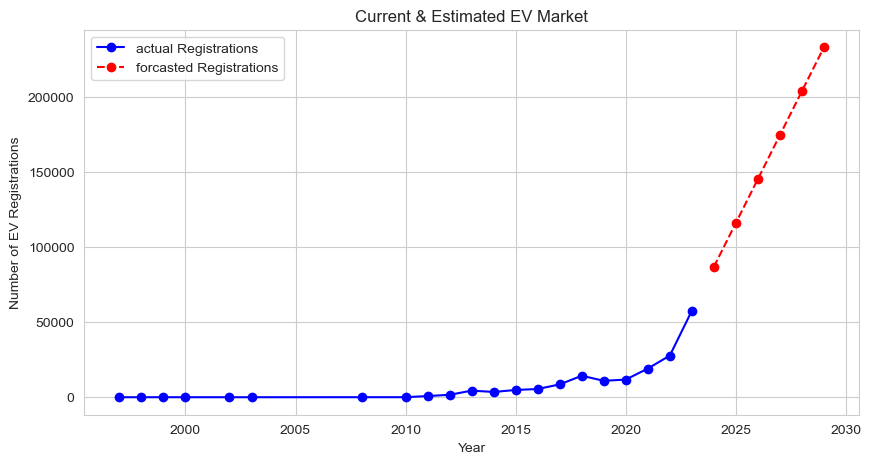

In [41]:
# prepare data for plotting
# years = np.arange(filtered_years.index.min(),2029+1)
# actual_years = filtered_years.index
# forcasted_years = np.arange(2024,2029+1)

# # actual and forecasted values
# actual_values = filtered_years.values
forecated_values = [arima_forecasted_evs[year] for year in forcasted_years]
plt.figure(figsize=(10,5))
plt.plot(actual_years,actual_values,'-bo',label='actual Registrations')
plt.plot(forcasted_years,forecated_values,'ro--',label='forcasted Registrations')
plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)
plt.show()